# Bernstein-Vazirani 알고리즘

이 섹션에서는 먼저 Bernstein-Vazirani 문제와 그 고전적 솔루션 및 이 문제를 해결하기 위한 양자 알고리즘을 소개합니다. 그런 다음 Qiskit을 사용하여 양자 알고리즘을 구현하고 시뮬레이터와 실제 양자 백엔드 모두에서 실행해 보겠습니다.

## 1. Bernstein-Vazirani 알고리즘<a id="algorithm"></a>

Reference [1]에서 처음 소개된 Bernstein-Vazirani 알고리즘은 지난 섹션에서 다룬 Deutsch-Jozsa 알고리즘의 확장으로 볼 수 있습니다. Deutsch-Jozsa 문제보다 더 복잡한 문제의 해결에 양자 컴퓨터를 사용하면 이점이 있을 수 있음을 보여주었습니다.

### 1.1  Bernstein-Vazirani 문제<a id="bvproblem"> </a>

다시 입력으로 비트 문자열($x$)을 사용하고 $0$ 또는 $1$를 반환하는 블랙박스 함수 $f$가 제공됩니다. 즉 $$f({x_0,x_1,x_2, ...}) \rightarrow 0 \textrm{ or } 1 \textrm{ where } x_n \textrm{ is }0 \textrm{ or } 1 $$입니다.

Deutsch-Jozsa 문제처럼  함수가 상수 함수이거나 균형 함수인 것이 아니라, 이제 함수는 문자열 $s$에 따라 입력의 비트 곱을 반환하게 됩니다. 즉, 입력 $x$, $f(x) = s \cdot x , \text{(mod 2)}$가 주어지며 $s$를 찾아내야 합니다. 고전적인 가역 회로로서 Bernstein-Vazirani 오라클은 다음과 같습니다.

![고전적인 가역 회로](images/bv2.png)

### 1.2 고전적 해법<a id="classical-solution"> </a>

일반적으로 오라클은 $$f_s(x) = s \cdot x \mod 2$$를 입력하면 $x$를 반환합니다. 따라서 숨겨진 비트 문자열 $s$는 여러가지 입력값들로 오라클을 탐색하여 드러낼 수 있습니다.

입력(x)
:-:
100...0
010...0
001...0
000...1

여기서 각 쿼리는 $s$의 서로 다른 비트($s_i$ 비트)를 나타냅니다. 예를 들어 `x = 1000...0` 일 때 $s$의 최하위 비트를 얻을 수 있고 `x = 0100...0` 일 때 다음 최하위 비트를 찾을 수 있는 방식입니다. 따라서 $f_s(x)$ 함수를 $n$ 번 호출해야 한다는 것을 의미합니다. 

### 1.3 양자 솔루션<a id="quantum-solution"> </a>

양자 컴퓨터를 사용하면 $f(x)$ 함수를 한 번만 호출하면 100% 확실하게이 문제를 해결할 수 있습니다. 숨겨진 비트 문자열을 찾는 양자 Bernstein-Vazirani 알고리즘은 매우 간단합니다.

1. 입력 큐비트를 $|0\rangle^{\otimes n}$ 상태로 초기화하고 출력 큐비트를 $|{-}\rangle$로 초기화합니다.
2. 입력 레지스터에 Hadamard 게이트 적용
3. 오라클 탐색
4. 입력 레지스터에 Hadamard 게이트 적용
5. 측정

<img src="images/bv1.png" alt="Bernstein-Vazirani 양자 회로">

알고리즘을 설명하기 위해 각 큐비트에 H-게이트를 적용할 때 어떤 일이 발생하는지 더 자세히 살펴보겠습니다. $n$-큐비트 $|a\rangle$인 상태에 H-gate를 적용하고 어떤 변환이 일어나는지 살펴봅시다.

$$ |a\rangle \xrightarrow{H^{\otimes n}} \frac{1}{\sqrt{2^n}} \sum_{x\in {0,1}^n} (-1)^ {a\cdot x}|x\rangle. $$

<details>
    <summary>방정식 설명(확대하려면 클릭)</summary>
</details>

 우리는 Hadamard가 하나의 큐비트에서 다음 변환을 수행한다는 것을 기억합니다.

$$ H|0\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle) $$ $$ H|1\rangle = \tfrac{1}{\sqrt{ 2}}(|0\rangle - |1\rangle) $$

합 표기을 사용하여 다음과 같이 다시 작성할 수 있습니다.

$$ H|a\rangle = \frac{1}{\sqrt{2}}\sum_{x\in {0,1}} (-1)^{a\cdot x}|x\rangle. $$

두 개의 큐비트에 대해 각각에 Hadamard를 적용하면 다음 변환이 수행됩니다.

$$ H^{\otimes 2}|00\rangle = \tfrac{1}{2}(|00\rangle + |01\rangle + |10\rangle + |11\rangle) $$ $$ H^{ \otimes 2}|01\rangle = \tfrac{1}{2}(|00\rangle - |01\rangle + |10\rangle - |11\rangle) $$ $$ H^{\otimes 2}| 10\rangle = \tfrac{1}{2}(|00\rangle + |01\rangle - |10\rangle - |11\rangle) $$ $$ H^{\otimes 2}|11\rangle = \ tfrac{1}{2}(|00\rangle - |01\rangle - |10\rangle + |11\rangle) $$

합을 사용하여 아래와 같이 표현할 수 있습니다.

$$ H^{\otimes 2}|a\rangle = \frac{1}{2}\sum_{x\in {0,1}^2} (-1)^{a\cdot x}|x\ 범위 $$

이제 위의 수식을 도출해 보도록 합시다.




특히, 양자 레지스터 $|00\dots 0\rangle$ 상태로 시작하여 $n$ Hadamard 게이트를 적용하면 익숙한 양자 중첩 상태를 얻게 됩니다.

$$ |00\dots 0\rangle \xrightarrow{H^{\otimes n}} \frac{1}{\sqrt{2^n}} \sum_{x\in {0,1}^n} |x \rangle $$

이 경우 $a=0$이므로 위상 항 $(-1)^{a\cdot x}$는 사라집니다. 따라서 $(-1)^{a\cdot x} = 1$입니다.

고전적 오라클 $f_s$는 $s \cdot x\mod 2 = 1$인 입력 $x$에 대해 $1$를 반환하고 그렇지 않으면 $0$를 반환합니다. Deutsch-Jozsa 알고리즘처럼 위상 반동 기법을 사용하고 $|{-}\rangle$ 상태의 큐비트에 대해 적용하면 다음 변환을 얻습니다.

$$ |x \rangle \xrightarrow{f_s} (-1)^{s\cdot x} |x \rangle $$

숨겨진 비트 문자열을 드러내는 알고리즘은 $|00\dots 0\rangle$의 Hadamard 변환에서 얻은 양자 중첩으로 양자 오라클 $f_s$를 쿼리하여 얻어집니다. 즉,

$$ |00\dots 0\rangle \xrightarrow{H^{\otimes n}} \frac{1}{\sqrt{2^n}} \sum_{x\in {0,1}^n} |x \rangle \xrightarrow{f_a} \frac{1}{\sqrt{2^n}} \sum_{x\in {0,1}^n} (-1)^{a\cdot x}|x\rangle $$

$n$ Hadamard 게이트의 역수는 다시 $n$ Hadamard 게이트이므로 $a$를 얻을 수 있습니다.

$$ \frac{1}{\sqrt{2^n}} \sum_{x\in {0,1}^n} (-1)^{a\cdot x}|x\rangle \xrightarrow{H^ {\otimes n}} |a\rangle $$

## 2. 예제<a id="example"></a>

$n=2$ 큐비트와 숨겨진 문자열 $s=11$에 대한 구체적인 예를 살펴보겠습니다. 단 하나의 레지스터를 사용하여 Bernstein-Vazirani 양자 오라클 회로를 생성 과정은 참조 [2]의 공식을 따르고 있음에 유의하십시오.

<ol>
    <li>두 큐비트의 레지스터는 0으로 초기화됩니다.</li>
</ol>

$$\lvert \psi_0 \rangle = \lvert 0 0 \rangle$$

   


   <li>두 큐비트에 Hadamard 게이트를 적용합니다.</li>


$$\lvert \psi_1 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle + \lvert 0 1 \rangle + \lvert 1 0 \rangle + \lvert 1 1 \rangle \right) $$

   


   <li>$s=11$ 문자열에 대해 양자 오라클은 $$ |x \rangle \xrightarrow{f_s} (-1)^{x\cdot 11} |x \rangle$$ 연산을 수행합니다.</li>


$$\lvert \psi_2 \rangle = \frac{1}{2} \left( (-1)^{00\cdot 11}|00\rangle + (-1)^{01\cdot 11}|01\ rangle + (-1)^{10\cdot 11}|10\rangle + (-1)^{11\cdot 11}|11\rangle \right)$$

$$\lvert \psi_2 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle - \lvert 0 1 \rangle - \lvert 1 0 \rangle + \lvert 1 1 \rangle \right) $$

   


   <li>두 큐비트에 Hadamard 게이트를 적용합니다.</li>


$$\lvert \psi_3 \rangle = \lvert 1 1 \rangle$$

   


   <li>숨겨진 문자열 $s=11$을 찾기 위한 측정</li>





아래 `bv_widget` 위젯을 사용합니다. 버튼을 눌러 다른 과정을 적용하고 알고리즘을 따라해 보십시오. 첫 두 개의 인수를 사용해 입력 큐비트 수와 숨겨진 문자열의 값을 변경할 수 있습니다.

In [1]:
from qiskit_textbook.widgets import bv_widget
bv_widget(2, "11")

HTMLMath(value='$$ |00\\rangle = |00\\rangle $$')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xce\x00\x00\x00\xcc\x08\x06\x00\x00\x00;\xd7\x9c…

## 3. Qiskit 구현<a id="implementation"></a>

이제 $s=011$인 3비트 함수에 대한 Qiskit의 Bernstein-Vazirani 알고리즘 구현을 살펴보겠습니다.

In [2]:
# initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

먼저 실험에 사용될 큐비트의 수와 알고리즘에서 찾을 숨겨진 비트 문자열 $s$를 설정합니다. 숨겨진 비트 문자열 $s$는 양자 오라클의 회로를 결정합니다. 

In [3]:
n = 3 # number of qubits used to represent s
s = '011'   # the hidden binary string

그런 다음 Qiskit을 사용하여 Bernstein-Vazirani 알고리즘을 프로그래밍합니다.

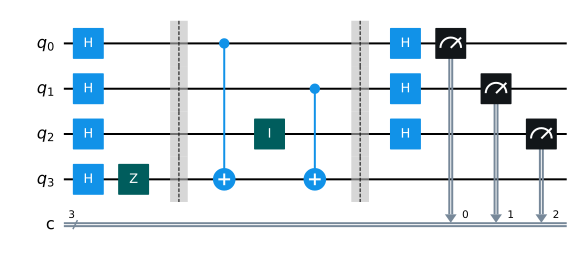

In [4]:
# We need a circuit with n qubits, plus one auxiliary qubit
# Also need n classical bits to write the output to
bv_circuit = QuantumCircuit(n+1, n)

# put auxiliary in state |->
bv_circuit.h(n)
bv_circuit.z(n)

# Apply Hadamard gates before querying the oracle
for i in range(n):
    bv_circuit.h(i)
    
# Apply barrier 
bv_circuit.barrier()

# Apply the inner-product oracle
s = s[::-1] # reverse s to fit qiskit's qubit ordering
for q in range(n):
    if s[q] == '0':
        bv_circuit.i(q)
    else:
        bv_circuit.cx(q, n)
        
# Apply barrier 
bv_circuit.barrier()

#Apply Hadamard gates after querying the oracle
for i in range(n):
    bv_circuit.h(i)

# Measurement
for i in range(n):
    bv_circuit.measure(i, i)

bv_circuit.draw()

### 3a. 시뮬레이터 실험<a id="simulation"></a>

시뮬레이터를 사용해 위의 회로를 실행해 봅시다. 

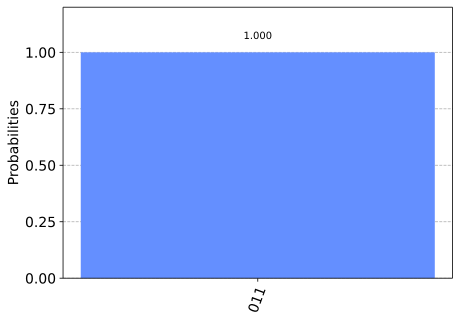

In [5]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
results = aer_sim.run(bv_circuit).result()
answer = results.get_counts()

plot_histogram(answer)

측정 결과가 숨겨진 문자열 `011` 임을 알 수 있습니다. 

### 3b. 실제 양자 백엔드로 실험<a id="device"></a>

아래와 같이 실제 장치에서 회로를 실행할 수 있습니다.

In [6]:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits <= 5 and
                                   x.configuration().n_qubits >= 2 and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_quito


In [7]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

shots = 1024
transpiled_bv_circuit = transpile(bv_circuit, backend)
job = backend.run(transpiled_bv_circuit, shots=shots)

job_monitor(job, interval=2)

Job Status: job has successfully run


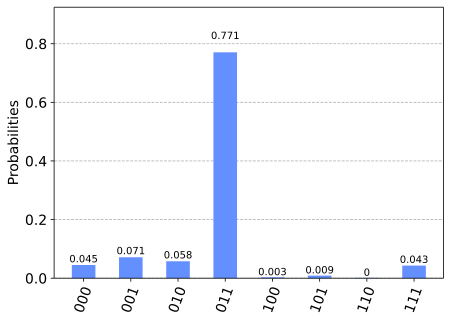

In [8]:
# Get the results from the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)

보시다시피 가장 높은 확률의 결과는 `011` 입니다. 다른 결들은 양자 계산의 에러로 인한 것입니다. 

## 4. 연습 <a id="problems"></a>

1. 아래 위젯을 사용하여 다양한 오라클에서 작동하는 Bernstein-Vazirani 알고리즘을 확인해 보십시오.

In [9]:
from qiskit_textbook.widgets import bv_widget
bv_widget(3, "011", hide_oracle=False)

HTMLMath(value='$$ |000\\rangle = |000\\rangle $$')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xce\x00\x00\x01\x08\x08\x06\x00\x00\x00\x17\xd9\…

1. 위의 Bernstein-Vazirani 알고리즘의 [구현](#implementation) 은 숨겨진 비트 문자열 $s = 011$에 대한 것입니다. 숨겨진 문자열 $s = 1011$에 대하여 수정해서 구현해 봅시다. 결과가 예상대로입니까? 설명해 봅시다.
2. 위의 Bernstein-Vazirani 알고리즘의 [구현](#implementation) 은 숨겨진 비트 문자열 $s = 011$에 대한 것입니다. 숨겨진 문자열 $s = 11101101$에 대하여 수정해서 구현해 봅시다. 결과가 예상대로입니까? 설명해 봅시다.

## 5. 참고문헌<a id="references"></a>

1. Ethan Bernstein and Umesh Vazirani (1997) "Quantum Complexity Theory" SIAM Journal on Computing, Vol. 26, No. 5: 1411-1473, [doi:10.1137/S0097539796300921](https://doi.org/10.1137/S0097539796300921).
2. Jiangfeng Du, Mingjun Shi, Jihui Wu, Xianyi Zhou, Yangmei Fan, BangJiao Ye, Rongdian Han (2001) "Implementation of a quantum algorithm to solve the Bernstein-Vazirani parity problem without entanglement on an ensemble quantum computer", Phys. Rev. A 64, 042306, [10.1103/PhysRevA.64.042306](https://doi.org/10.1103/PhysRevA.64.042306), [arXiv:quant-ph/0012114](https://arxiv.org/abs/quant-ph/0012114). 

In [10]:
import qiskit.tools.jupyter
%qiskit_version_table

/usr/local/anaconda3/envs/terra-unstable/lib/python3.9/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
